In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv("C:/Users/conma/Downloads/archive (3)/dataset.csv")

# Count NA values per column
print(df.isna().sum())
# Drop NA values
df = df.dropna() 
# Drop random column
df = df.drop("Unnamed: 0", axis=1)
# Show data types
print(df.dtypes)
# Drop unnecessary columns
df0 = df.drop(columns = ["track_id", "artists", "album_name", "track_name"], axis=1)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature       

In [571]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,cluster,pca_x,pca_y,artist_lower,artist_cleaned,track_name_cleaned
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.715,87.917,4,acoustic,13,-0.575141,-0.060975,gen hoshino,gen hoshino,comedy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.267,77.489,4,acoustic,7,0.634195,0.614605,ben woodward,ben woodward,ghost - acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.120,76.332,4,acoustic,10,0.468736,0.082351,ingrid michaelson;zayn,ingrid michaelson;zayn,to begin again
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.143,181.740,3,acoustic,7,0.666415,0.688514,kina grannis,kina grannis,can't help falling in love
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.167,119.949,4,acoustic,10,0.467387,0.148984,chord overstreet,chord overstreet,hold on


In [254]:
# Summary stats of numeric columns
df0.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


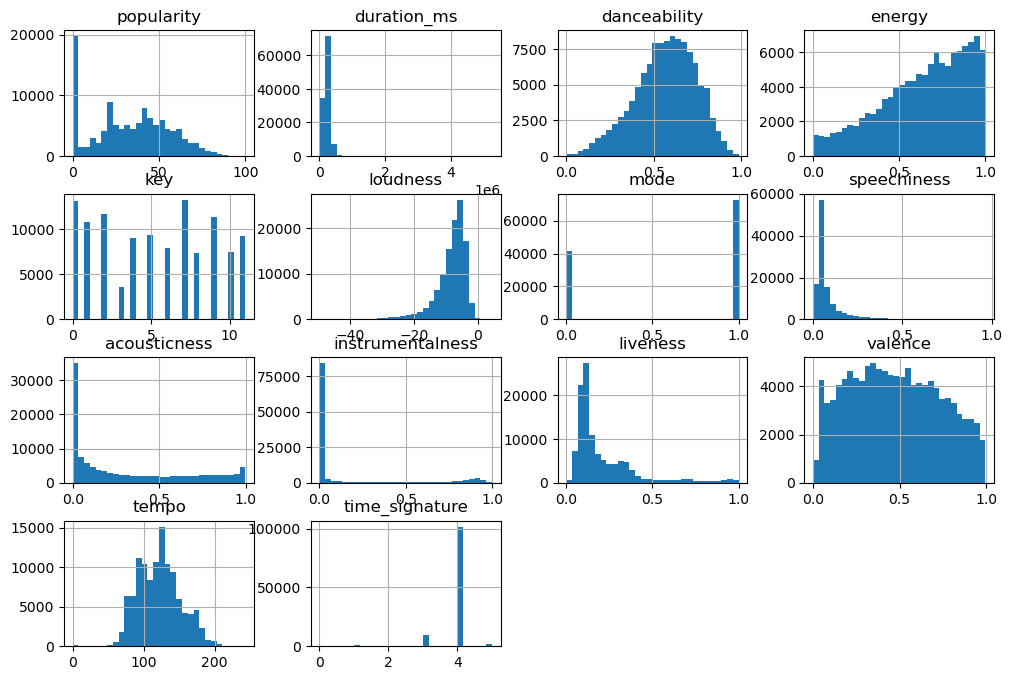

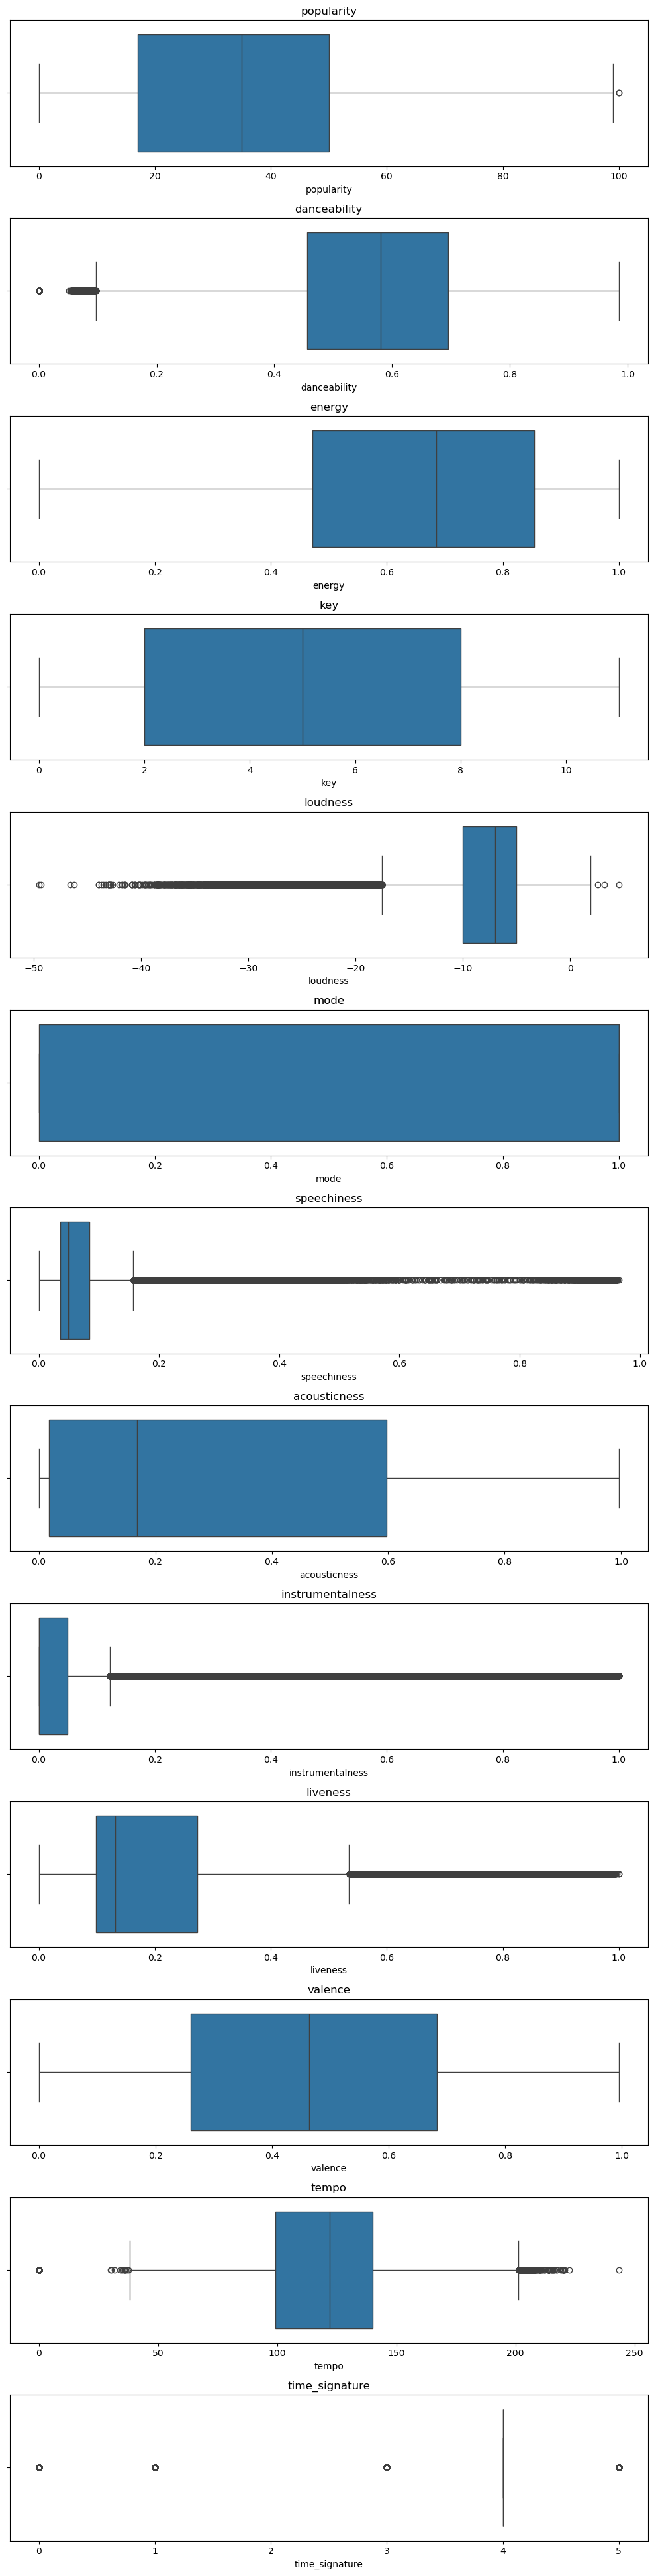

In [573]:
# Histogram of numerical features
df0.hist(figsize=(12,8), bins=30)
plt.show()

df_filtered = df0.select_dtypes(include=['number']).drop(columns=["duration_ms"])

# Boxplots
fig, axes = plt.subplots(nrows=len(df_filtered.columns), figsize=(10, 3 * len(df_filtered.columns)))

# Loop through each column and create a separate boxplot
for i, col in enumerate(df_filtered.columns):
    sns.boxplot(x=df_filtered[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

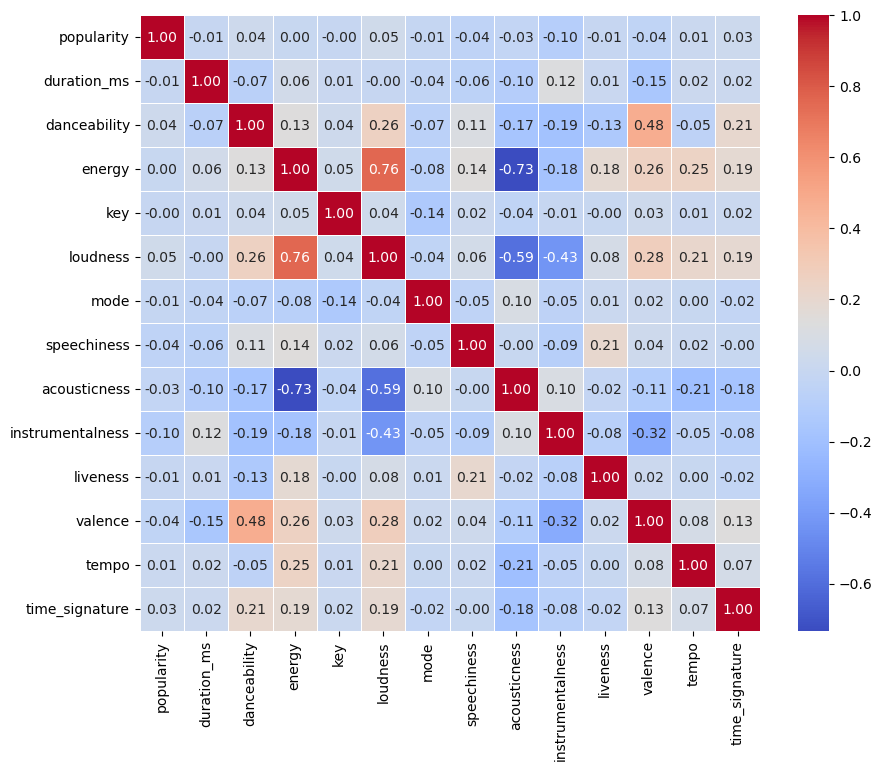

In [579]:
numerical_df = df0.select_dtypes(include=['number'])

# Create correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode the explicit column
label_encoder = LabelEncoder()
df0['explicit'] = label_encoder.fit_transform(df0['explicit'])

# creates dummy variables for genre column(114 extra columns)
df1 = pd.get_dummies(df0, columns=["track_genre"])

# convert only the 114 columns
df1.iloc[:, 14:129] = df1.iloc[:, 14:129].astype(int)

print(len(df1.columns))
df1.tail()

In [164]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(df1)
print(data_minmax)

[[0.73       0.0424732  0.         ... 0.         0.         0.        ]
 [0.55       0.02697109 0.         ... 0.         0.         0.        ]
 [0.57       0.03867876 0.         ... 0.         0.         0.        ]
 ...
 [0.22       0.05027627 0.         ... 0.         0.         1.        ]
 [0.41       0.05265296 0.         ... 0.         0.         1.        ]
 [0.22       0.04460757 0.         ... 0.         0.         1.        ]]


Text(0, 0.5, 'Inertia')

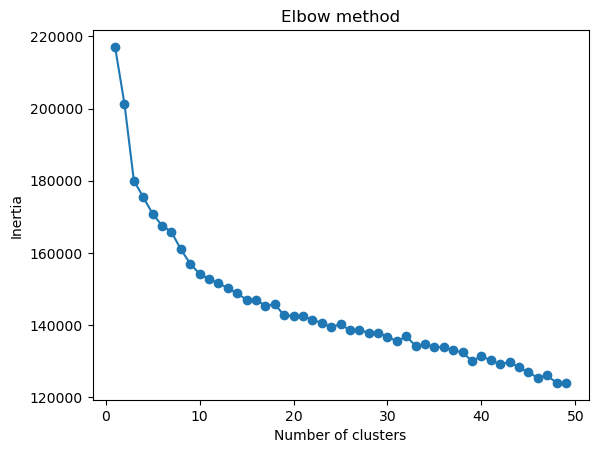

In [486]:
from sklearn.cluster import KMeans 

# Elbow method for genre onehot encoded
inertias = []

for i in range(1,50):  
    kmeans = KMeans(n_clusters=i,n_init='auto')
    kmeans.fit(data_minmax)
    inertias.append(kmeans.inertia_)

fig1 = plt.figure(1) 
plt.plot(range(1,50), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [488]:
# Kmeans with genre onehot encoded
kmeans = KMeans(n_clusters=10,n_init='auto')
label = kmeans.fit_predict(data_minmax)
u_labels = np.unique(label)

from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
sil_score = silhouette_score(data_minmax, label)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.06276604464186165


In [174]:
# dataframe without genre column
nogenre_df = df.drop("track_genre", axis = 1)

min_max_scaler = preprocessing.MinMaxScaler()
data_minmax1 = min_max_scaler.fit_transform(nogenre_df)
print(data_minmax1)

[[0.73       0.0424732  0.         ... 0.71859296 0.36124534 0.8       ]
 [0.55       0.02697109 0.         ... 0.26834171 0.31839735 0.8       ]
 [0.57       0.03867876 0.         ... 0.12060302 0.31364331 0.8       ]
 ...
 [0.22       0.05027627 0.         ... 0.74673367 0.54393274 0.8       ]
 [0.41       0.05265296 0.         ... 0.41507538 0.55865095 0.8       ]
 [0.22       0.04460757 0.         ... 0.71155779 0.32541952 0.8       ]]


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


Text(0, 0.5, 'Inertia')

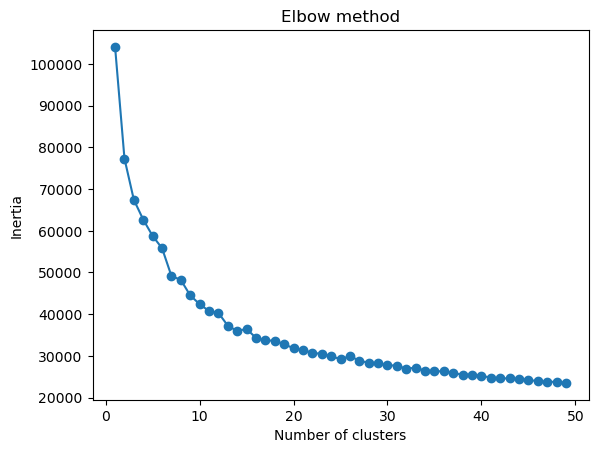

In [490]:
#Elbow method for no genre column
inertias1 = []

for i in range(1,50):  
    kmeans = KMeans(n_clusters=i,n_init='auto')
    kmeans.fit(data_minmax1)
    inertias1.append(kmeans.inertia_)

fig2 = plt.figure(2) 
plt.plot(range(1,50), inertias1, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [492]:
#Kmeans for data without genre column
kmeans1 = KMeans(n_clusters=15,n_init='auto')
label1 = kmeans1.fit_predict(data_minmax1)
u_labels = np.unique(label1)

# Calculate the Silhouette Score
sil_score = silhouette_score(data_minmax1, label1)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.15403504559651257


In [613]:
db_index = davies_bouldin_score(data_minmax1, label1)

print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.6449070214473454


In [627]:
from sklearn.decomposition import PCA

# PCA on data with genre onehot encoded
pca = PCA(n_components=2)  # Reduce to 2 dimensions

data_pca = pca.fit_transform(data_minmax)

# Display the components and their corresponding feature contributions
pca_components = pd.DataFrame(pca.components_, columns=data_minmax.columns)

# Display the component loadings for the first few components
print(pca_components)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Text(0, 0.5, 'Inertia')

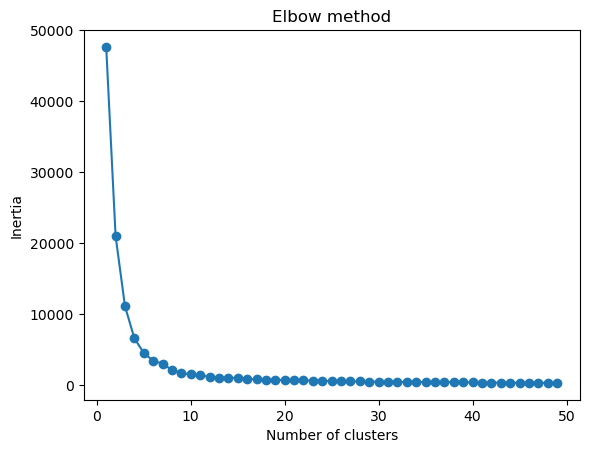

In [494]:
# Elbow method for pca data
inertias2 = []

for i in range(1,50):  
    kmeans = KMeans(n_clusters=i,n_init='auto')
    kmeans.fit(data_pca)
    inertias2.append(kmeans.inertia_)

fig2 = plt.figure(2) 
plt.plot(range(1,50), inertias2, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [587]:
from sklearn.decomposition import PCA

# Perform K-Means again on reduced data
kmeans = KMeans(n_clusters=4, n_init='auto')
label = kmeans.fit_predict(data_pca)

sil_score = silhouette_score(data_pca, label)
print(f"Silhouette Score after PCA: {sil_score}")


Silhouette Score after PCA: 0.6200770528207391


In [609]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data_pca, label)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.5558754027248488


In [589]:
df1['cluster'] = label
df1['cluster'].value_counts()

cluster
2    51051
1    32158
0    21630
3     9160
Name: count, dtype: int64

In [591]:
cluster_summary = df1.groupby('cluster').mean()
cluster_summary.tail()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
cluster,,,,,,,,,,,,,,,,,,,,,
0,31.632224,216677.129357,0.014517,0.487481,0.329105,4.728063,-13.247224,1.0,0.064094,0.750926,...,0.004623,0.019926,0.009801,0.002173,0.021683,0.003375,0.000462,0.005871,0.002127,0.012760
1,34.321102,234861.264164,0.123235,0.609763,0.759421,6.101810,-6.342545,0.0,0.097458,0.144466,...,0.009671,0.002426,0.007463,0.011039,0.000653,0.012128,0.015828,0.011101,0.015859,0.002115
2,33.585571,228743.701162,0.104405,0.587512,0.752535,5.035944,-6.370937,1.0,0.088081,0.164280,...,0.010891,0.001391,0.009970,0.011067,0.000215,0.009461,0.009285,0.006973,0.005583,0.011616
3,31.300546,226892.350000,0.015284,0.487842,0.344910,5.420852,-13.730162,0.0,0.069132,0.723158,...,0.003603,0.045852,0.004258,0.003603,0.054476,0.005895,0.000764,0.017467,0.017358,0.006878


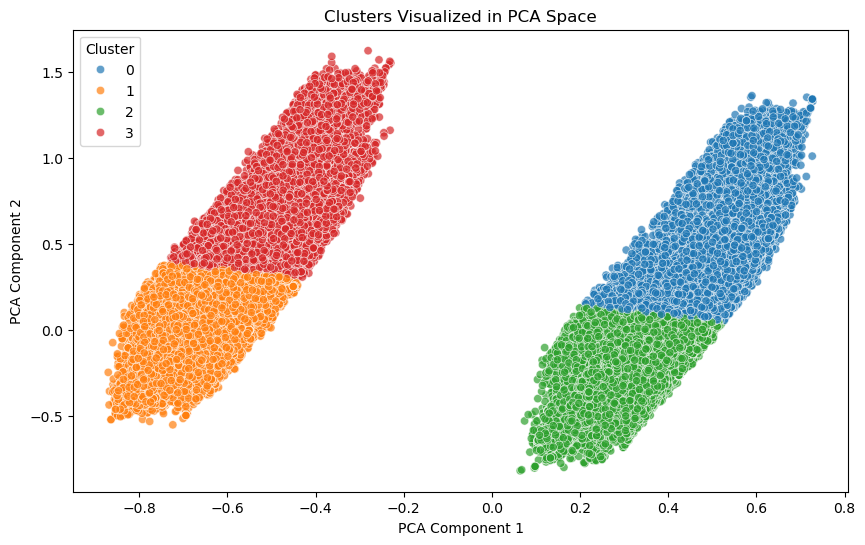

In [615]:
# Scatter plot of first two PCA components, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=label, palette="tab10", alpha=0.7)

# Labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualized in PCA Space")
plt.legend(title="Cluster")
plt.show()

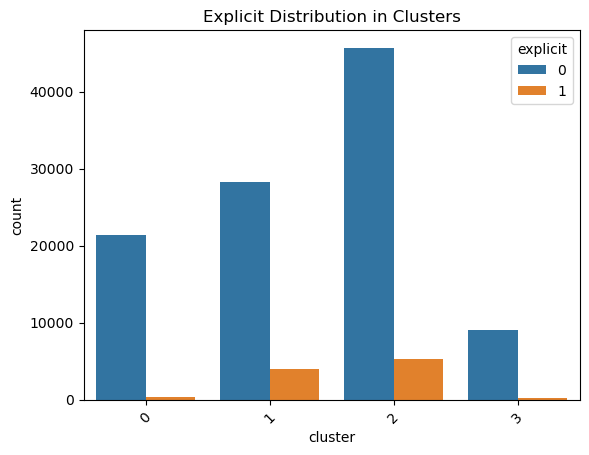

In [642]:

sns.countplot(x='cluster', hue='explicit', data=df1)
plt.title('Explicit Distribution in Clusters')
plt.xticks(rotation=45)
plt.show()

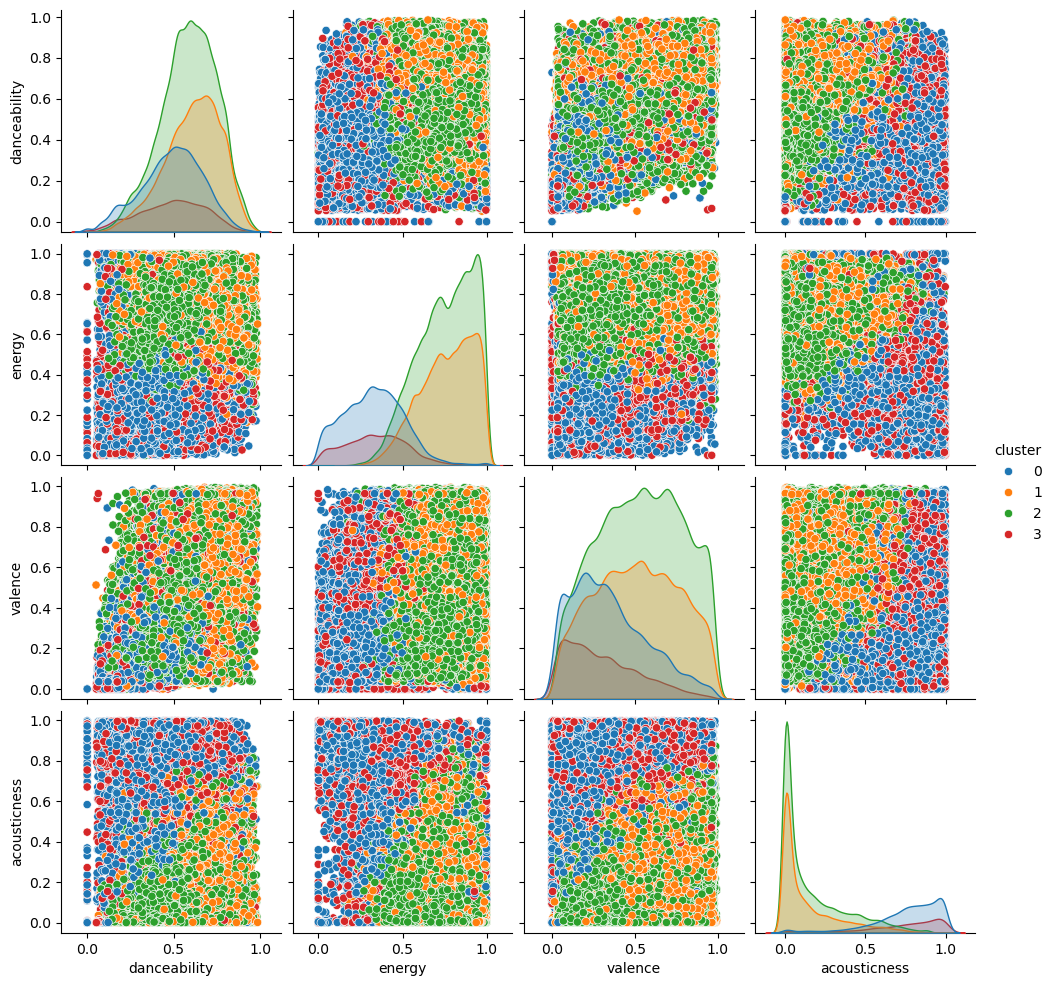

In [599]:
sns.pairplot(df1, hue="cluster", vars=['danceability', 'energy', 'valence', 'acousticness'], palette="tab10")
plt.show()

In [511]:
# Part 2 - Recommendor system
df['cluster'] = label
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster,pca_x,pca_y
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,13,-0.575141,-0.060975
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,7,0.634195,0.614605
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,10,0.468736,0.082351
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,7,0.666415,0.688514
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,10,0.467387,0.148984


In [662]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# Normalize artist names by stripping whitespace and converting to lowercase
df['artist_cleaned'] = df['artists'].str.lower().str.strip()

# Select relevant features for similarity calculation
song_features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']  # Modify based on dataset

def recommend_songs(input_song, input_artist, df, num_recommendations=5):
    # Normalize input artist
    input_artist_cleaned = input_artist.lower().strip()

    # Find input song in dataset
    song_row = df[(df['track_name'].str.lower().str.strip() == input_song.lower().strip()) & 
                  (df['artist_cleaned'] == input_artist_cleaned)]
    
    if song_row.empty:
        return "Song not found in dataset. Please check the track name and artist."

    input_cluster = song_row['cluster'].values[0]
    input_genre = song_row['track_genre'].values[0]  # Get input song genre

    # Filter songs: same cluster, same genre, different artist
    cluster_songs = df[
        (df['cluster'] == input_cluster) & 
        (~df['artist_cleaned'].str.contains(input_artist_cleaned)) &  # Exclude songs with the input artist, even in collaborations
        (df['track_genre'] == input_genre)
    ]
    
    if cluster_songs.empty:
        return "Not enough songs with the same genre from different artists in this cluster."

    # Extract feature vectors
    input_vector = song_row[song_features].values
    cluster_vectors = cluster_songs[song_features].values

    # Compute cosine similarity
    similarities = cosine_similarity(input_vector, cluster_vectors)[0]

    # Add similarity scores to dataframe
    cluster_songs = cluster_songs.copy()
    cluster_songs['similarity'] = similarities

    # Sort by similarity
    cluster_songs = cluster_songs.sort_values(by='similarity', ascending=False)

    # Ensure we get 5 unique artists
    recommendations = cluster_songs.drop_duplicates(subset="artist_cleaned").head(num_recommendations)

    return recommendations[['track_name', 'artists', 'track_genre', 'similarity']]

# Ask user for input
input_song = input("Enter track name: ")
input_artist = input("Enter artist name: ")

# Get recommendations
recommendations = recommend_songs(input_song, input_artist, df)

# Display results
if isinstance(recommendations, str):
    print(recommendations)
else:
    print("\nRecommended Songs:")
    print(recommendations.to_string(index=False))


Enter track name:  radioactive
Enter artist name:  imagine dragons



Recommended Songs:
                       track_name       artists track_genre  similarity
                    Thunderstruck         AC/DC        rock    0.999999
        Knockin' On Heaven's Door Guns N' Roses        rock    0.999999
                             残響散歌         Aimer        rock    0.999999
Sharp Dressed Man - 2003 Remaster        ZZ Top        rock    0.999999
    We Wish You A Merry Christmas        Weezer        rock    0.999998
